In [1]:
import pandas as pd

train_df = pd.read_csv('era_tour.csv')
test_df = pd.read_csv('era_tour.csv')


In [2]:
print(train_df.head())


    artist_name                              track_name  is_explicit  \
0  Taylor Swift  Miss Americana & The Heartbreak Prince        False   
1  Taylor Swift                            Cruel Summer        False   
2  Taylor Swift                                 The Man        False   
3  Taylor Swift                   You Need To Calm Down        False   
4  Taylor Swift                                   Lover        False   

  album_release_date genres  danceability  valence  energy  loudness  \
0         2019-08-23    pop         0.662    0.487   0.747    -6.926   
1         2019-08-23    pop         0.552    0.564   0.702    -5.707   
2         2019-08-23    pop         0.777    0.633   0.658    -5.191   
3         2019-08-23    pop         0.771    0.714   0.671    -5.617   
4         2019-08-23    pop         0.359    0.453   0.543    -7.582   

   acousticness  instrumentalness  liveness  speechiness  key    tempo  mode  \
0       0.02800          0.006150    0.1380       0.07

In [3]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         44 non-null     object 
 1   track_name          44 non-null     object 
 2   is_explicit         44 non-null     bool   
 3   album_release_date  44 non-null     object 
 4   genres              44 non-null     object 
 5   danceability        44 non-null     float64
 6   valence             44 non-null     float64
 7   energy              44 non-null     float64
 8   loudness            44 non-null     float64
 9   acousticness        44 non-null     float64
 10  instrumentalness    44 non-null     float64
 11  liveness            44 non-null     float64
 12  speechiness         44 non-null     float64
 13  key                 44 non-null     int64  
 14  tempo               44 non-null     float64
 15  mode                44 non-null     int64  
 16  duration_m

In [4]:
print(train_df.describe())

       danceability    valence     energy   loudness  acousticness  \
count     44.000000  44.000000  44.000000  44.000000     44.000000   
mean       0.599477   0.395736   0.576909  -7.895841      0.280691   
std        0.110550   0.202988   0.172917   2.509138      0.293417   
min        0.359000   0.049900   0.240000 -14.132000      0.000443   
25%        0.534250   0.225250   0.408500 -10.236500      0.036375   
50%        0.609500   0.416000   0.600000  -7.510500      0.126500   
75%        0.646500   0.511750   0.713000  -5.707000      0.524250   
max        0.872000   0.903000   0.866000  -3.546000      0.920000   

       instrumentalness   liveness  speechiness        key       tempo  \
count         44.000000  44.000000    44.000000  44.000000   44.000000   
mean           0.000798   0.137098     0.075068   5.272727  123.261841   
std            0.003592   0.085399     0.063762   3.636786   32.815035   
min            0.000000   0.057600     0.025300   0.000000   68.534000   

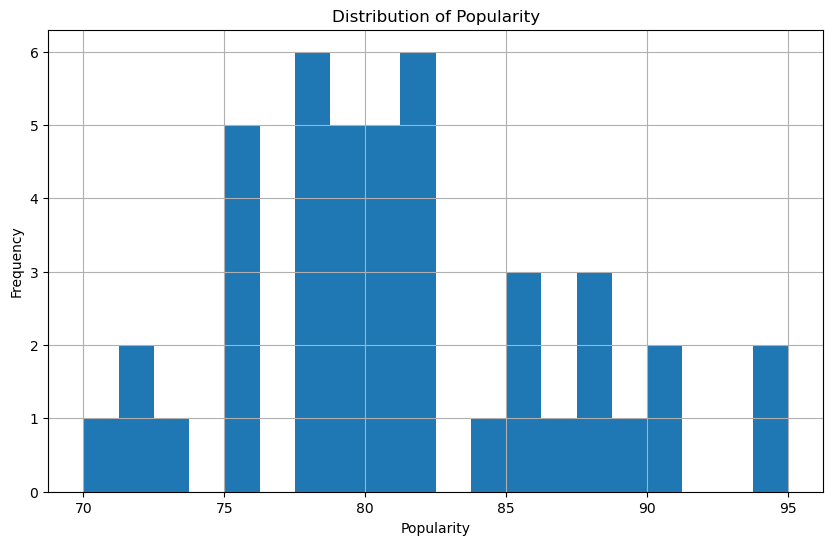

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train_df['popularity'].hist(bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [6]:
train_df['album_release_date'] = pd.to_datetime(train_df['album_release_date'])

train_df['is_explicit'] = train_df['is_explicit'].astype(int)

train_df = pd.get_dummies(train_df, columns=['genres'], drop_first=True)


In [7]:
train_df['release_year'] = train_df['album_release_date'].dt.year
train_df['release_month'] = train_df['album_release_date'].dt.month
train_df['release_day'] = train_df['album_release_date'].dt.day

train_df.drop('album_release_date', axis=1, inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = train_df.drop(['track_name', 'artist_name', 'popularity'], axis=1)
y = train_df['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test RMSE: {rmse}')


Test RMSE: 4.080842777880297


In [11]:
predictions = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, predictions, squared=False)
print(f'Test RMSE: {rmse}')


Test RMSE: 2.4338474965296477


In [13]:
results = train_df[['track_name', 'artist_name']].copy()
results['Predicted_Popularity'] = predictions

# Display the first few rows of the results
print(results.head())

                               track_name   artist_name  Predicted_Popularity
0  Miss Americana & The Heartbreak Prince  Taylor Swift                 80.15
1                            Cruel Summer  Taylor Swift                 88.65
2                                 The Man  Taylor Swift                 82.31
3                   You Need To Calm Down  Taylor Swift                 81.52
4                                   Lover  Taylor Swift                 84.98


In [14]:
results.to_csv('predicted_popularity.csv', index=False)